In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

# Correct file path
file_path = '/content/spam.csv'

# Adjusting to the correct delimiter and encoding
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e:
    error = str(e)

# Check if the dataframe was loaded successfully or return an error
if 'df' in locals():
    success = True
    sample_data = df.head()
else:
    success = False
    sample_data = None

success, sample_data, error if not success else ''


(True,
      v1                                                 v2 Unnamed: 2  \
 0   ham  Go until jurong point, crazy.. Available only ...        NaN   
 1   ham                      Ok lar... Joking wif u oni...        NaN   
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
 3   ham  U dun say so early hor... U c already then say...        NaN   
 4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
 
   Unnamed: 3 Unnamed: 4  
 0        NaN        NaN  
 1        NaN        NaN  
 2        NaN        NaN  
 3        NaN        NaN  
 4        NaN        NaN  ,
 '')

# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [3]:
df.shape

(5572, 5)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.describe(include='object')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


_**Note: No NaN values** in the dataset._

In [11]:
# Mapping values for label in df
# Correctly mapping values for the 'v1' column in df
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,0,Rofl. Its true to its name,NaN,NaN,NaN


In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

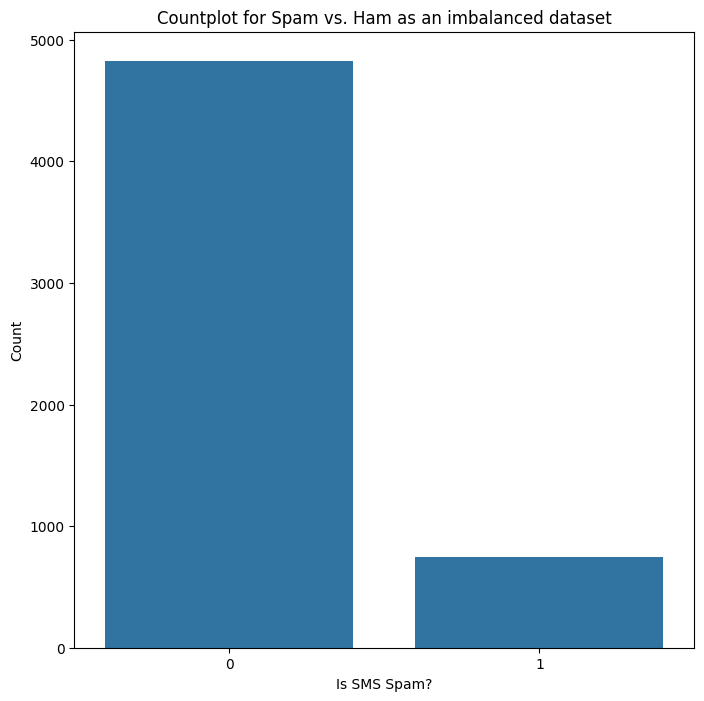

In [15]:
# Countplot for Spam vs. Ham as imbalanced dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_dataframe' with the actual name of your DataFrame variable
plt.figure(figsize=(8, 8))
g = sns.countplot(x='v1', data=df)  # Make sure 'v1' is the correct column name for your labels
plt.title('Countplot for Spam vs. Ham as an imbalanced dataset')
plt.xlabel('Is SMS Spam?')
plt.ylabel('Count')
plt.show()  # Ensures that the plot is displayed in some environments


_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.



In [16]:
# Assuming 'v1' is the column with spam (1) and ham (0) after mapping
only_spam = df[df['v1'] == 1]  # Use the correct column name here
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0] - only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [17]:
# Assume this step is needed if mapping is already applied
only_spam = df[df['v1'] == 1]

# The rest of your code remains the same
count = int((df.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

balanced_df = df.copy()
for i in range(0, count-1):
    balanced_df = pd.concat([balanced_df, only_spam], ignore_index=True)

balanced_df_shape = balanced_df.shape


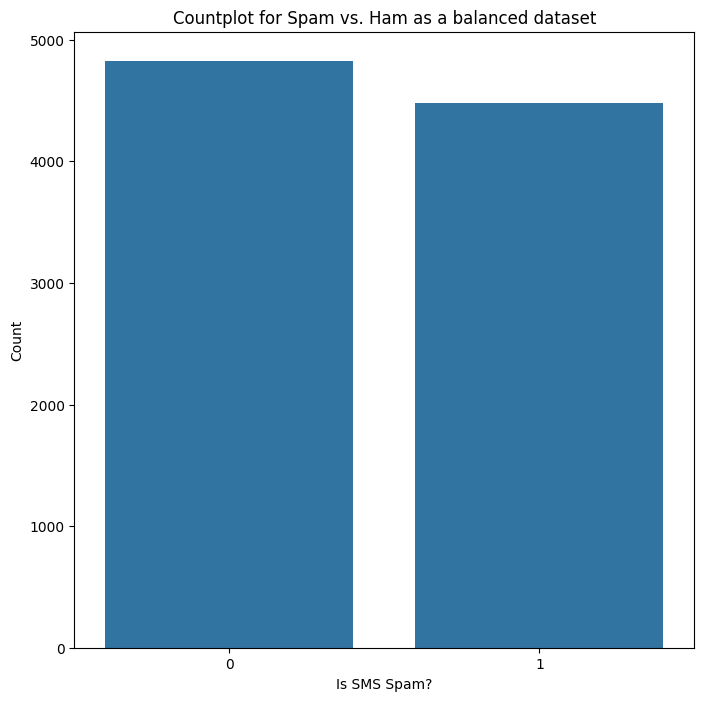

In [18]:
# Assuming balanced_df is your balanced dataframe
plt.figure(figsize=(8, 8))
g = sns.countplot(x='v1', data=balanced_df)  # Use 'v1' as it contains your mapped labels
plt.title('Countplot for Spam vs. Ham as a balanced dataset')
plt.xlabel('Is SMS Spam?')  # This can stay as is, it's just a label for the x-axis
plt.ylabel('Count')  # This labels the y-axis
plt.show()  # Ensures the plot is displayed

In [19]:
# Creating new feature word_count
# Creating new feature word_count based on the correct column name
df['word_count'] = df['v2'].apply(lambda x: len(x.split()))

In [20]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13


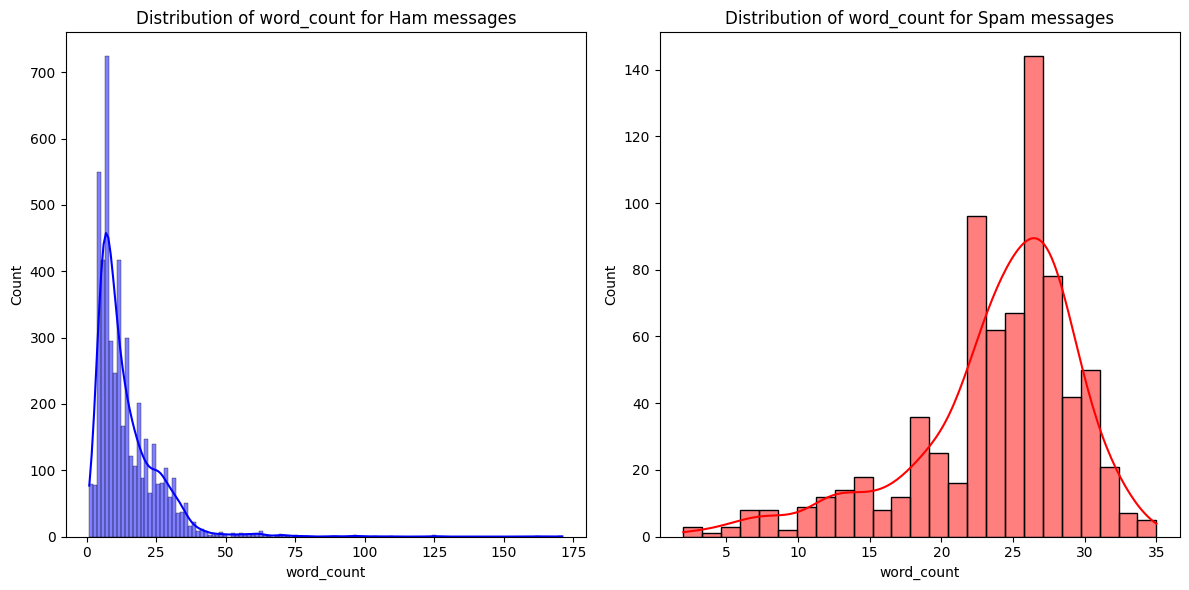

In [21]:
plt.figure(figsize=(12, 6))

# Adjusting column reference to 'v1' if that's your label column
plt.subplot(1, 2, 1)
sns.histplot(df[df['v1']==0]['word_count'], kde=True, color='blue')
plt.title('Distribution of word_count for Ham messages')

plt.subplot(1, 2, 2)
sns.histplot(df[df['v1']==1]['word_count'], kde=True, color='red')
plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()


_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [22]:
# Creating feature contains_currency_symbol
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    if isinstance(x, str):  # Checks if the input is a string
        return any(i in x for i in currency_symbols)
    return 0  # Returns 0 if the input is not a string

# Assuming 'v2' is the column with message text
df['contains_currency_symbol'] = df['v2'].apply(currency)

In [23]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbol
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,30,True
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,8,False
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,10,False
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,26,False
5571,0,Rofl. Its true to its name,NaN,NaN,NaN,6,False


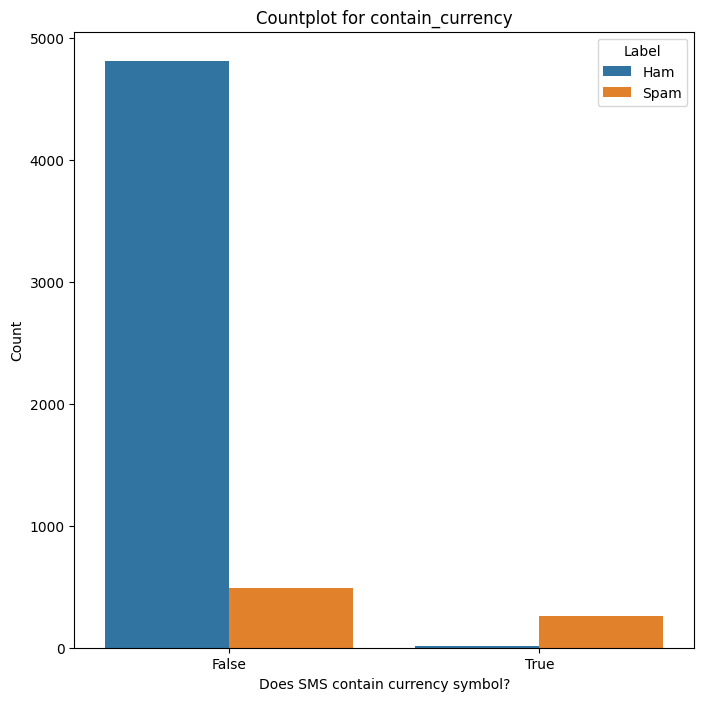

In [24]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
# Adjusting 'hue' to match your DataFrame's label column
g = sns.countplot(x='contains_currency_symbol', data=df, hue='v1')
plt.title('Countplot for contain_currency')
plt.xlabel('Does SMS contain currency symbol?')
plt.ylabel('Count')
# Adjusting legend labels to match the numeric mapping, if necessary
plt.legend(title='Label', labels=['Ham', 'Spam'], loc='upper right')
plt.show()

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [25]:
# Creating feature contains_number
# Define the function to check for numbers in the text
def numbers(x):
    if isinstance(x, str):  # Check if the input is a string
        for i in x:
            if '0' <= i <= '9':  # Simplified check for digits
                return 1
    return 0

# Assuming df is your DataFrame and 'v2' is the correct column for SMS messages
# Replace 'v2' with the actual column name containing the message texts in your DataFrame
df['contains_number'] = df['v2'].apply(numbers)

# Example for verifying the result (optional)
print(df.head())



   v1                                                 v2 Unnamed: 2  \
0   0  Go until jurong point, crazy.. Available only ...        NaN   
1   0                      Ok lar... Joking wif u oni...        NaN   
2   1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   0  U dun say so early hor... U c already then say...        NaN   
4   0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  word_count  contains_currency_symbol  contains_number  
0        NaN        NaN          20                     False                0  
1        NaN        NaN           6                     False                0  
2        NaN        NaN          28                     False                1  
3        NaN        NaN          11                     False                0  
4        NaN        NaN          13                     False                0  


In [26]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,False,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,False,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,False,1
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,False,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,False,0


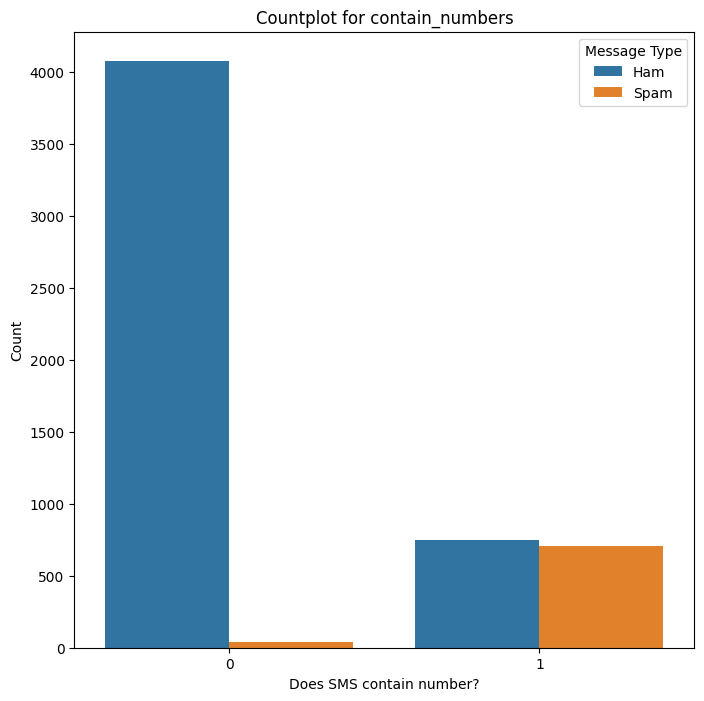

In [27]:
# Countplot for contains_number
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='v1')  # Ensure 'label' is the correct column name
plt.title('Countplot for contain_numbers')
plt.xlabel('Does SMS contain number?')
plt.ylabel('Count')
# Assuming 'label' exists and represents Ham/Spam; adjust labels based on your DataFrame's actual representation
plt.legend(title='Message Type', labels=['Ham', 'Spam'], loc='upper right')
plt.show()


_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [28]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
# Cleaning the messages
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
wnl = WordNetLemmatizer()

# Initialize an empty list to hold the cleaned messages
corpus = []

# Assuming 'v2' is the correct column name for your messages
for sms_string in df['v2']:  # Adjust 'v2' to the actual column name

    # Cleaning special character from the sms and converting to lower case
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string).lower()

    # Tokenizing the sms by words and removing stop words
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

    # Rejoining the lemmatized words to form the cleaned message
    message = ' '.join(lemmatized_words)

    # Appending the cleaned message to the corpus
    corpus.append(message)


In [30]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [31]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'corpus' is already created successfully
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()  # Use get_feature_names_out() for sklearn versions 0.24 and above

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['v1']  # Use the actual label column name here



# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.897 ---
Standard Deviation: 0.016


In [35]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.97      0.81      0.88       150

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



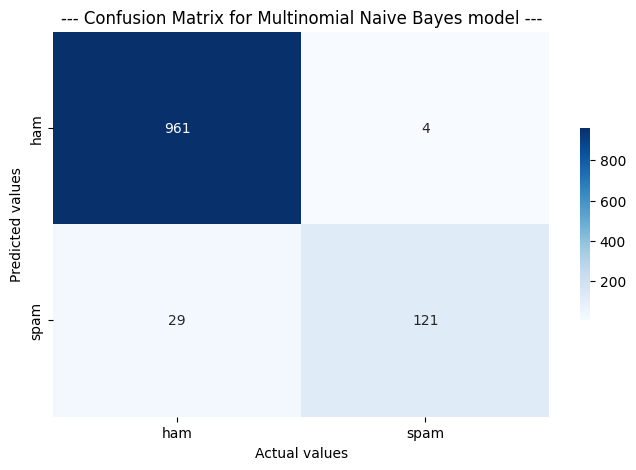

In [36]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [37]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.871 ---
Standard Deviation: 0.034


In [38]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.88      0.84      0.86       150

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115



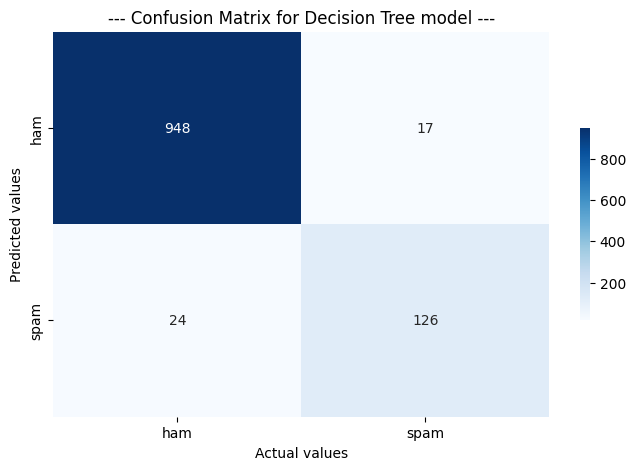

In [39]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [40]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.908 ---
Standard Deviation: 0.022


In [41]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



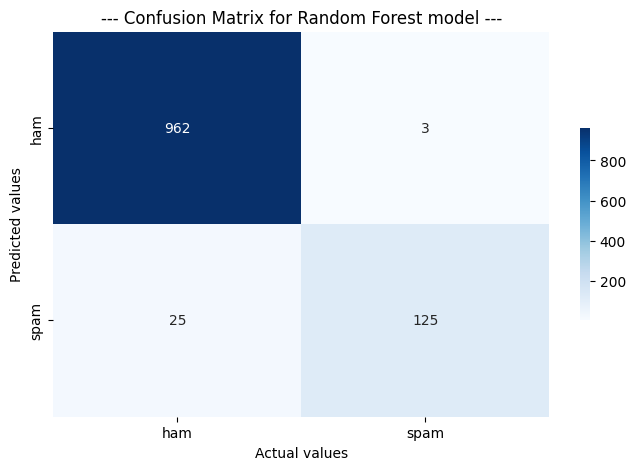

In [42]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [43]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.86 ---
Standard Deviation: 0.02


_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_


# **Making Predictions**

In [44]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [45]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'
if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
